In [9]:
import gym
import numpy as np
import time

##### FrozenLake environment
- 16 states (one for each square)
- 4 possible actions (LEFT, RIGHT, DOWN, UP)
- 4 different types of blocks (F: frozen, H: hole, S: start, G: goal)

In [3]:
env = gym.make('FrozenLake-v0')  # we are going to use the FrozenLake enviornment

In [4]:
print(env.observation_space.n)   # get number of states
print(env.action_space.n)   # get number of actions

16
4


In [5]:
env.reset()  # reset enviornment to default 

0

In [6]:
action = env.action_space.sample()  # get a random action 

In [7]:
new_state, reward, done, info = env.step(action)  # take action, notice it returns information about the action

In [8]:
env.render()   # render the GUI for the enviornment 

  (Down)
SFFF
FHFH
FFFH
HFFG


##### building the Q-Table

In [10]:
env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

In [ ]:
Q = np.zeros((STATES, ACTIONS))  # create a matrix with all 0 values 
Q

##### constants

In [13]:
EPISODES = 2000 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

##### picking an action
- would look like this

In [ ]:
epsilon = 0.9  # start with a 90% chance of picking a random action

# code to pick action
if np.random.uniform(0, 1) < epsilon:  # we will check if a randomly selected value is less than epsilon.
    action = env.action_space.sample()  # take random action
else:
    action = np.argmax(Q[state, :])  # use Q table to pick best action based on current values

##### updating Q-Values

In [ ]:
Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[new_state, :]) - Q[state, action])

##### final program

In [25]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 10000 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

RENDER = False # if you want to see training set to true

epsilon = 0.9

In [26]:
rewards = []
for episode in range(EPISODES):

  state = env.reset()
  for _ in range(MAX_STEPS):
    
    if RENDER:
      env.render()

    if np.random.uniform(0, 1) < epsilon:
      action = env.action_space.sample()  
    else:
      action = np.argmax(Q[state, :])

    next_state, reward, done, _ = env.step(action)

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state

    if done: 
      rewards.append(reward)
      epsilon -= 0.001
      break  # reached goal

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")
# and now we can see our Q values!

[[3.42455857e-01 1.75296390e-02 2.09491076e-02 2.15692678e-02]
 [3.69890323e-03 7.49970539e-04 1.65886534e-02 2.25162084e-01]
 [8.55545310e-03 2.59861371e-01 7.06721728e-03 1.12997111e-02]
 [2.00449821e-03 5.72086661e-03 1.51496129e-03 1.08592803e-01]
 [5.19205585e-01 1.21063033e-02 8.90046862e-03 1.81474635e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.74615739e-06 2.29342922e-01 6.26705074e-07 1.15402729e-07]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.18546053e-02 1.27708092e-02 7.17234515e-03 6.52394951e-01]
 [1.69553085e-03 6.49113059e-01 5.89227656e-03 3.57135175e-03]
 [7.99655574e-01 1.96728215e-04 8.61872308e-04 7.10692459e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.87456830e-02 1.90140385e-02 8.76760772e-01 2.85225074e-02]
 [9.11209092e-02 9.94390145e-01 9.07939041e-02 1.06826933e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

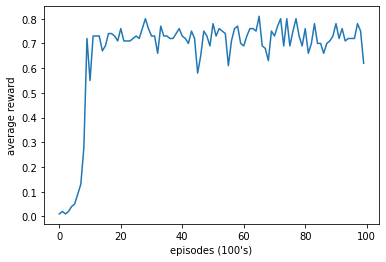

In [27]:
# we can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100])) 

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()